<h1 style="text-align: center; background: indigo; color: white; padding: auto 20px;">Assignment 1</h1>
<p style="text-align: right;"><b>CS184 | OL151</b></p>
<p style="text-align: right;">
    Angeles, Terrence<br />
    Escalambre, Isaiah Emmanuelle<br />
    Mendillo, Rey Victor<br />
    Mesias, Lee Reuben
</p>

# 1. Mention 5 applications of network.  

## Specific Applications

• Criminal Investigation

• DNA Translation

• Logic Circuits

• Blockchain

• Sudoku

## General Applications

• Graphing

• Circular Tree

• Four Grids

• Blockmodel

• Node Colormap

# 2. Use any one of the applications from Q-1 to apply Networkx. Say an example, if the application is contact tracing in this COVID pandemic, then use Python’s Networkx package to show whom do we need to test first?

# Who's the Thief and its Corresponding Truth Teller?

This is very useful if we are aware of the number of truth tellers and there is only one scenario corresponding to that number of truth tellers.

## Import Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from random import choice, choices

## Simple Example

A - I'm not the thief.

B - A is the thief.

C - I'm not the thief.

Directed graph is used because if A accuses B, that does not necessarily mean that B also accuses A.

In [2]:
graph = nx.DiGraph()

Adding the relationships through the edges minimizes the code because the nodes are also being created.

In [3]:
graph.add_edges_from([("A", "B"), ("A", "C"), ("B", "A"), ("C", "A"), ("C", "B")])

If A points to B, it means that A is accusing B as the thief.

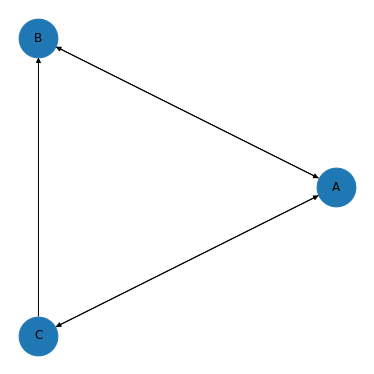

In [4]:
plt.figure(figsize=(5, 5))
nx.draw_circular(graph, with_labels=True, node_size=1500)
plt.show()

in_degree is useful to count the number of accusers pointing to a certain node.

In [5]:
telling_the_truth = graph.in_degree

This prints all the possible scenarios.

In [6]:
for thief, num_of_people in telling_the_truth:
    print(f"{thief} may be the thief, if {num_of_people} people is/are telling the truth.")

A may be the thief, if 2 people is/are telling the truth.
B may be the thief, if 2 people is/are telling the truth.
C may be the thief, if 1 people is/are telling the truth.


This asks the number of truth tellers and suggests the possible thieves and truth tellers therefrom.

In [7]:
people_telling_the_truth = int(input("How many people are telling the truth? "))
if people_telling_the_truth in dict(telling_the_truth).values():
    possible_thieves = [thief for thief, num_of_people in telling_the_truth if num_of_people == people_telling_the_truth]
    print(f"{possible_thieves} may be the thief/thieves.")
    for thief in possible_thieves:
        accusations = list(graph.in_edges)
        truth_tellers = [accusation[0] for accusation in accusations if thief == accusation[1]]
        print(f"{thief} is the thief, if {truth_tellers} is/are the truth teller/s.")
else:
    print(f"No possible thieves, if {people_telling_the_truth} people is/are telling the truth.")

How many people are telling the truth? 2
['A', 'B'] may be the thief/thieves.
A is the thief, if ['B', 'C'] is/are the truth teller/s.
B is the thief, if ['A', 'C'] is/are the truth teller/s.


## More Complicated Example

A - I'm not the thief.

B - A is the thief.

C - I'm not the thief.

D - B is the thief.

Directed graph is used because if A accuses B, that does not necessarily mean that B also accuses A.

In [8]:
graph = nx.DiGraph()

Adding the relationships through the edges minimizes the code because the nodes are also being created.

In [9]:
graph.add_edges_from([("A", "B"), ("A", "C"), ("A", "D"), ("B", "A"), ("C", "A"), ("C", "B"), ("C", "D"), ("D", "B")])

If A points to B, it means that A is accusing B as the thief.

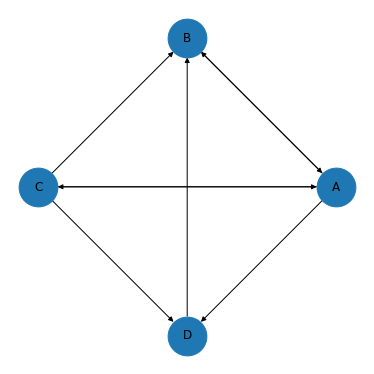

In [10]:
plt.figure(figsize=(5, 5))
nx.draw_circular(graph, with_labels=True, node_size=1500)
plt.show()

in_degree is useful to count the number of accusers pointing to a certain node.

In [11]:
telling_the_truth = graph.in_degree

This prints all the possible scenarios.

In [12]:
for thief, num_of_people in telling_the_truth:
    print(f"{thief} may be the thief, if {num_of_people} people is/are telling the truth.")

A may be the thief, if 2 people is/are telling the truth.
B may be the thief, if 3 people is/are telling the truth.
C may be the thief, if 1 people is/are telling the truth.
D may be the thief, if 2 people is/are telling the truth.


This asks the number of truth tellers and suggests the possible thieves and truth tellers therefrom.

In [13]:
people_telling_the_truth = int(input("How many people are telling the truth? "))
if people_telling_the_truth in dict(telling_the_truth).values():
    possible_thieves = [thief for thief, num_of_people in telling_the_truth if num_of_people == people_telling_the_truth]
    print(f"{possible_thieves} may be the thief/thieves.")
    for thief in possible_thieves:
        accusations = list(graph.in_edges)
        truth_tellers = [accusation[0] for accusation in accusations if thief == accusation[1]]
        print(f"{thief} is the thief, if {truth_tellers} is/are the truth teller/s.")
else:
    print(f"No possible thieves, if {people_telling_the_truth} people is/are telling the truth.")

How many people are telling the truth? 1
['C'] may be the thief/thieves.
C is the thief, if ['A'] is/are the truth teller/s.


## Randomly Generated Example

Directed graph is used because if A accuses B, that does not necessarily mean that B also accuses A.

In [14]:
graph = nx.DiGraph()

These actions are based on the patterns above.

In [15]:
actions = ["accuse_someone", "accuse_everyone"]

This limits the generation to 10 people, so that the graph can still be visualized.

In [16]:
people = [chr(letter) for letter in range(ord("A"), ord("J")+1)]

In [17]:
print(people)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']


This only adds the nodes without the relationships.

In [18]:
graph.add_nodes_from(people)

This generates the problem or random accusations whether a single person or everyone else.

In [19]:
for person in people:
    action = choices(actions, weights=[70, 30])[0]
    everyone_else = [x for x in people if x != person]
    if action == "accuse_someone":
        someone = choice(everyone_else)
        print(f"{person} - {someone} is the thief.")
        graph.add_edge(person, someone)
    elif action == "accuse_everyone":
        print(f"{person} - I'm not the thief.")
        for someone in everyone_else:
            graph.add_edge(person, someone)

A - F is the thief.
B - I'm not the thief.
C - E is the thief.
D - A is the thief.
E - I'm not the thief.
F - A is the thief.
G - I is the thief.
H - I'm not the thief.
I - A is the thief.
J - B is the thief.


If A points to B, it means that A is accusing B as the thief.

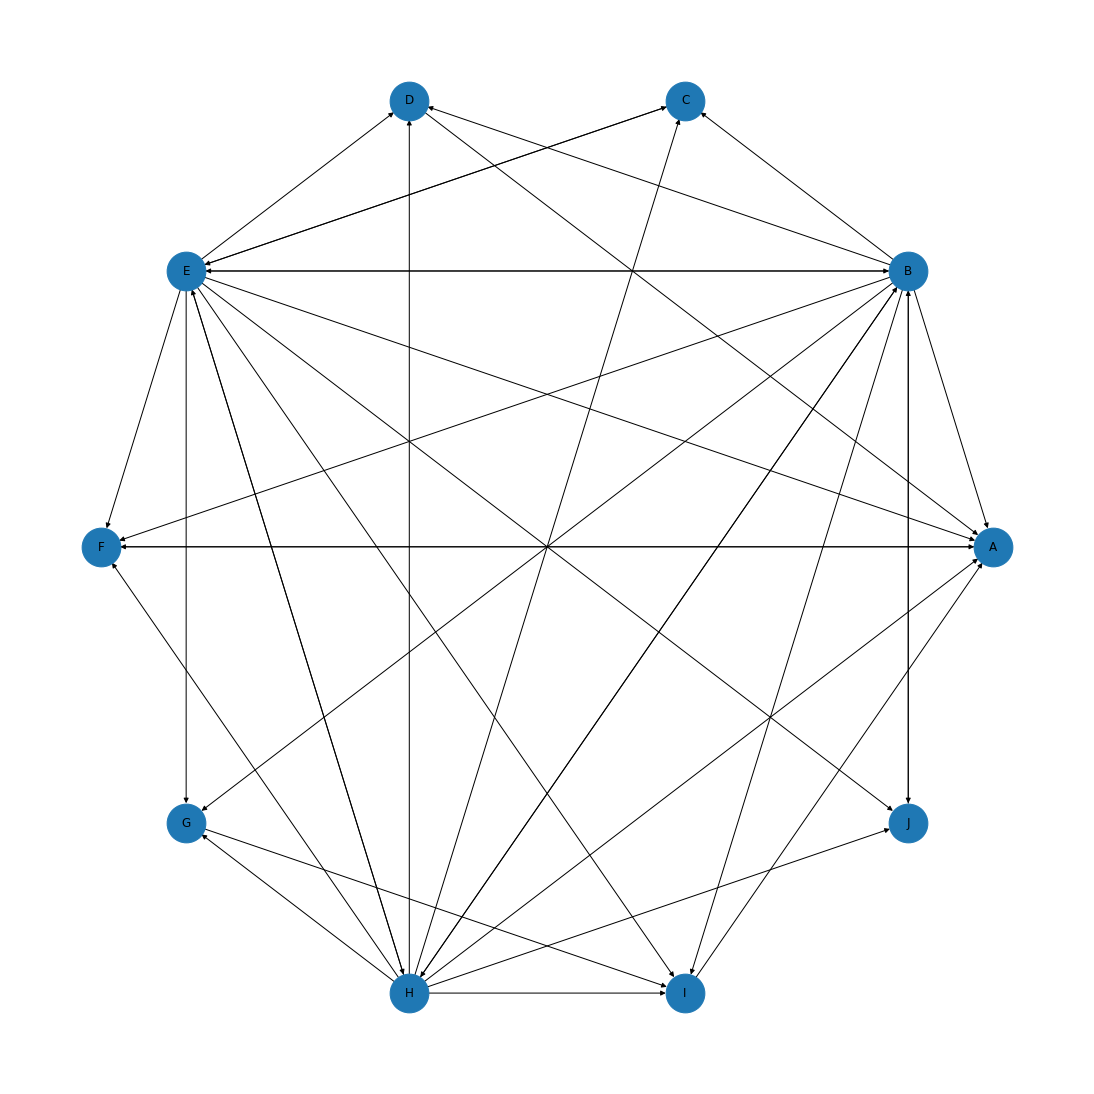

In [20]:
plt.figure(figsize=(15, 15))
nx.draw_circular(graph, with_labels=True, node_size=1500)
plt.show()

in_degree is useful to count the number of accusers pointing to a certain node.

In [21]:
telling_the_truth = graph.in_degree

This prints all the possible scenarios.

In [22]:
for thief, num_of_people in telling_the_truth:
    print(f"{thief} may be the thief, if {num_of_people} people is/are telling the truth.")

A may be the thief, if 6 people is/are telling the truth.
B may be the thief, if 3 people is/are telling the truth.
C may be the thief, if 3 people is/are telling the truth.
D may be the thief, if 3 people is/are telling the truth.
E may be the thief, if 3 people is/are telling the truth.
F may be the thief, if 4 people is/are telling the truth.
G may be the thief, if 3 people is/are telling the truth.
H may be the thief, if 2 people is/are telling the truth.
I may be the thief, if 4 people is/are telling the truth.
J may be the thief, if 3 people is/are telling the truth.


This asks the number of truth tellers and suggests the possible thieves and truth tellers therefrom.

In [23]:
people_telling_the_truth = int(input("How many people are telling the truth? "))
if people_telling_the_truth in dict(telling_the_truth).values():
    possible_thieves = [thief for thief, num_of_people in telling_the_truth if num_of_people == people_telling_the_truth]
    print(f"{possible_thieves} may be the thief/thieves.")
    for thief in possible_thieves:
        accusations = list(graph.in_edges)
        truth_tellers = [accusation[0] for accusation in accusations if thief == accusation[1]]
        print(f"{thief} is the thief, if {truth_tellers} is/are the truth teller/s.")
else:
    print(f"No possible thieves, if {people_telling_the_truth} people is/are telling the truth.")

How many people are telling the truth? 4
['F', 'I'] may be the thief/thieves.
F is the thief, if ['A', 'B', 'E', 'H'] is/are the truth teller/s.
I is the thief, if ['B', 'E', 'G', 'H'] is/are the truth teller/s.
